In [20]:
from datetime import datetime
import MetaTrader5 as mt5
import numpy as np

mt5.initialize()

rates = mt5.copy_rates_from('GBPUSD', mt5.TIMEFRAME_H1, datetime(2020, 10, 2, 19), 10000)
# rates2 = mt5.copy_rates_from('EURUSD', mt5.TIMEFRAME_H1, datetime(2020, 6, 2, 19), 2000)
# rates3 = mt5.copy_rates_from('EURUSD', mt5.TIMEFRAME_D1, datetime(2020, 10, 2, 19), 400)
# rates4 = mt5.copy_rates_from('EURUSD', mt5.TIMEFRAME_H1, datetime(2020, 10, 2, 19), 10000)

mt5.shutdown()


True

In [24]:
from numpy import savez_compressed

savez_compressed('data.npz', rates)

In [26]:
import pandas as pd
import numpy as np

from numpy import load
# load dict of arrays
dict_data = load('data.npz')
data=dict_data['arr_0']


def _return(d: pd.Series):
    return d.iloc[-1]/d.iloc[0]-1


def _diff(d: pd.Series):
    return d.iloc[-1]-d.iloc[0]




df = pd.DataFrame(data).loc[:, [
    'time', 'open', 'high', 'low', 'close', 'tick_volume']]
df = df.rename(columns={'time': 'Time', 'high': 'High', 'low': 'Low',
                        'close': 'Close', 'tick_volume': 'Volume', 'open': 'Open'})

df['Time'] = pd.to_datetime(df['Time'], unit='s')
df = df.set_index('Time')


# df['Return1'] = df['Open'].rolling(2).apply(_return)
# df['Return2'] = df['Open'].rolling(3).apply(_return)
# df['Return3'] = df['Open'].rolling(4).apply(_return)

df['Diff1'] = df['Open'].rolling(2).apply(_diff)
df['Diff4'] = df['Open'].rolling(2).apply(_diff)
df['Diff24'] = df['Open'].rolling(25).apply(_diff)
# df['Diff2'] = df['Open'].rolling(3).apply(_diff)
# df['Diff3'] = df['Open'].rolling(4).apply(_diff)

df['Diff1_1'] = df['Diff1'].rolling(2).apply(_diff)
df['Diff1_1_1'] = df['Diff1_1'].rolling(2).apply(_diff)
df['Diff1_1_1_1'] = df['Diff1_1_1'].rolling(2).apply(_diff)




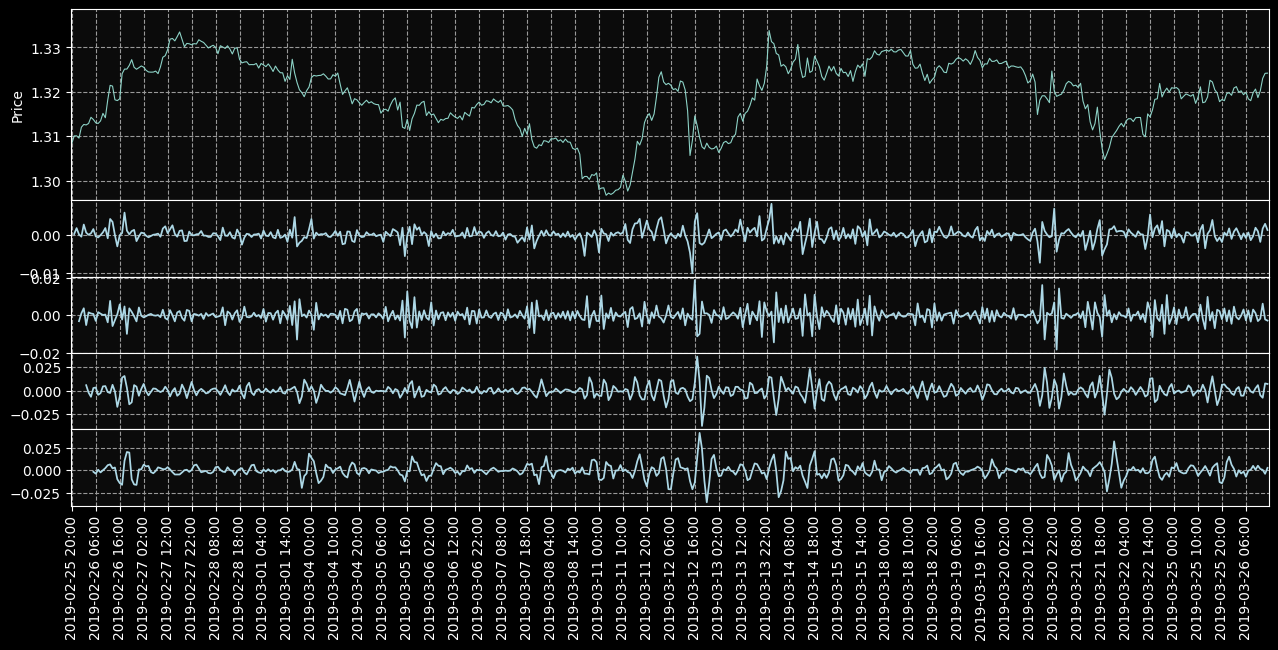

In [27]:
import matplotlib.pyplot as plt
import matplotlib.figure as mpfg
import mplfinance as mpf



df['Diff10'] = df['Open'].rolling(2).apply(_diff)
df['Diff20'] = df['Open'].rolling(3).apply(_diff)
df['Diff30'] = df['Open'].rolling(4).apply(_diff)
for i in range(0,2):
    df['Diff10'] = df['Diff10'].rolling(2).apply(_diff)
for i in range(0,2):
    df['Diff20'] = df['Diff20'].rolling(3).apply(_diff)
for i in range(0,2):
    df['Diff30'] = df['Diff30'].rolling(4).apply(_diff)

dp = df[:500]
apds = [
    # mpf.make_addplot(dp['Return1'], panel=1, color='lightblue', secondary_y=False),
    # mpf.make_addplot(dp['Return2'], panel=1, color='royalblue', secondary_y=False),
    # mpf.make_addplot(dp['Return3'], panel=1, color='darkblue', secondary_y=False),
    # mpf.make_addplot(dp['Diff1'], panel=1, color='lightblue', secondary_y=False),
    # mpf.make_addplot(dp['Diff4'], panel=1, color='royalblue', secondary_y=False),
    # mpf.make_addplot(dp['Diff24'], panel=1, color='blue', secondary_y=False),
    # mpf.make_addplot(dp['Diff1_1'], panel=2, color='orange', secondary_y=False),
    # mpf.make_addplot(dp['Diff1_1_1'], panel=3, color='red', secondary_y=False),
    # mpf.make_addplot(dp['Diff1_1_1_1'], panel=4, color='yellow', secondary_y=False),
    # mpf.make_addplot(dp['Diff2'], panel=2, color='red', secondary_y=True),
    # mpf.make_addplot(dp['Diff3'], panel=2, color='darkred', secondary_y=True),
    mpf.make_addplot(dp['Diff1'], panel=1, color='lightblue', secondary_y=False),
    mpf.make_addplot(dp['Diff10'], panel=2, color='lightblue', secondary_y=False),
    mpf.make_addplot(dp['Diff20'], panel=3, color='lightblue', secondary_y=False),
    mpf.make_addplot(dp['Diff30'], panel=4, color='lightblue', secondary_y=False),
]

fig, axes = mpf.plot(dp, addplot=apds, figratio=(24, 10), type='line', style='nightclouds', volume=False,
                     datetime_format='%Y-%m-%d %H:%M', xrotation=90, tight_layout=True, returnfig=True)
axes[0].locator_params(nbins=50, axis='x')
plt.show()